In [316]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
import numpy as np
from scipy.spatial import distance_matrix

import astropy.units as u
import os
import glob
# This makes nice big plots for matplotlib
import matplotlib as mpl
params = {'font.size': 14,
          'figure.figsize': (15.0, 8.0),
          'lines.linewidth': 2.,
          'lines.markersize': 15,
          'animation.embed_limit': 2048,
          }
mpl.rcParams.keys()
mpl.rcParams.update(params)
np.set_printoptions(suppress=True)

import sunpy.map

data_dir = os.path.abspath("/home/lazar/Fak(s)/AF/prakse/SDSA/data")

cont_list = sorted(glob.glob(os.path.join(
    data_dir, "3481_11923_SHARP_CEA_enhanced_norm/*enhanced_normalized*")))


magnetic_data_dir = os.path.join(
    data_dir, "3481_11923_SHARP_CEA_upscaled_magnetic_data")
Br_list = sorted(glob.glob(os.path.join(
    magnetic_data_dir, "*Br*")))
Bp_list = sorted(glob.glob(os.path.join(
    magnetic_data_dir, "*Bp*")))
Bt_list = sorted(glob.glob(os.path.join(
    magnetic_data_dir, "*Bt*")))
patches_dir = os.path.join(data_dir, "3481_11923_SHARP_CEA_patches")
patches_list = sorted(glob.glob(os.path.join(patches_dir, "*patches*")))

In [192]:
import sys
sys.path.append("..") # Adds higher directory to python modules path.
#This so i can fetch this function which is in directory above
from region_fill_master_wrap import get_patches_and_vectors
from skimage.feature import match_descriptors

In [193]:
help(get_patches_and_vectors)

Help on function get_patches_and_vectors in module region_fill_master_wrap:

get_patches_and_vectors(I, bx, by, bz, pixel_limit=20, thr=0.5, floodfill=4)
    I - intensity map for detecting pores; should be normalized to quiet sun
    bx - bx data (should be Bp from sharps) type should be sunpy map
    by - by data (should be Bt from sharps) type should be sunpy map. DO NOT CHANGE SIGN OF DATA, THIS FUNCTION WILL DO IT!
    bz - bz data (should be Br from sharps) type should be sunpy map
    pixel_limit - ignore patches that are smaller than this size
    thr - if I < thr => we assign it as pixel of interes; if data is normalized, 0.5 should work
    floodfill - in how many direction structure should perform flood fill
    https://en.wikipedia.org/wiki/Flood_fill
    
    floodfill = 4 looks in 4 direction and search structure looks like this
       [[0,1,0],
        [1,1,1],
        [0,1,0]]
    
    floodfill = 8 looks in 8 direction and search structure looks like this
        [[1,1

In [194]:
cmasses, _ = get_patches_and_vectors(sunpy.map.Map(cont_list[650]), 
                        sunpy.map.Map(Bp_list[650]), 
                        sunpy.map.Map(Bt_list[650]), 
                        sunpy.map.Map(Br_list[650]), pixel_limit=25)

Using 4 directions search map on HMI hmi 2013-12-13 21:10:09


In [195]:
print(np.loadtxt(patches_list[650]))
print(cmasses)

[[ 1139.52238806   592.          -215.23507908  -231.39415137
  -1320.33331954    67.        ]
 [ 1130.14285714   613.20571429  -191.71509699  -463.3988206
  -1647.18270998   175.        ]
 [  948.2          675.00740741   501.57266708    92.17912835
   1480.04186609   135.        ]
 [  936.60869565   671.60869565   227.75444014  -376.75290841
   1578.75588182    23.        ]
 [  929.19047619   673.04761905  -105.23079053  -318.0144968
   1514.06757042    21.        ]
 [  830.73076923   682.03846154  -383.74010477   136.96013992
   1309.80831902    26.        ]
 [  936.25         680.85          45.56766789   248.89492558
   1829.64629229    20.        ]
 [  847.20940171   688.31623932   -30.22556229   146.4120374
   1710.48048017   234.        ]]
[[ 1139.52238806   592.          -215.23507908  -231.39415137
  -1320.33331954    67.        ]
 [ 1130.14285714   613.20571429  -191.71509699  -463.3988206
  -1647.18270998   175.        ]
 [  948.2          675.00740741   501.57266708    92.

In [196]:
#plt.imshow(regioni)

## Define 2D gaussian window

In [197]:
def gauss2dwindow(cent, sigma, dim):
    x, y = np.meshgrid(np.linspace(0,dim[1],dim[1]), np.linspace(0,dim[0],dim[0]))
    g = np.exp(-( ((x-cent[0])**2) / ( 2.0 * sigma[0]**2 ) + ((y-cent[1])**2) / ( 2.0 * sigma[1]**2 ) ))
    return g

In [198]:
#plt.figure(size='same')
#gauss2dwindow([400,400],[5,5], [1000,1500]).shape
#plt.colorbar()

In [348]:
start = 601
plim = 20
I1 = sunpy.map.Map(cont_list[start])
I2 = sunpy.map.Map(cont_list[start+1])
I3 = sunpy.map.Map(cont_list[start+2])
centers_1, region_map_1 = get_patches_and_vectors(sunpy.map.Map(cont_list[start]),
                                                  sunpy.map.Map(
                                                      Bp_list[start]),
                                                  sunpy.map.Map(
                                                      Bt_list[start]),
                                                  sunpy.map.Map(Br_list[start]), pixel_limit=plim, floodfill=4)

centers_2, region_map_2 = get_patches_and_vectors(sunpy.map.Map(cont_list[start+1]),
                                                  sunpy.map.Map(
                                                      Bp_list[start+1]),
                                                  sunpy.map.Map(
                                                      Bt_list[start+1]),
                                                  sunpy.map.Map(Br_list[start+1]), pixel_limit=plim, floodfill=4)

centers_3, region_map_3 = get_patches_and_vectors(sunpy.map.Map(cont_list[start+2]),
                                                  sunpy.map.Map(
                                                      Bp_list[start+2]),
                                                  sunpy.map.Map(
                                                      Bt_list[start+2]),
                                                  sunpy.map.Map(Br_list[start+2]), pixel_limit=plim, floodfill=4)

#box edge for LCT



Using 4 directions search map on HMI hmi 2013-12-13 11:22:09
Using 4 directions search map on HMI hmi 2013-12-13 11:34:09
Using 4 directions search map on HMI hmi 2013-12-13 11:46:09


# This kind of does not work, LCT

In [349]:
box_edge = 40
region = 4
from skimage.feature import match_template

gauss_mask = gauss2dwindow([centers_1[region,0],centers_1[region,1]], [10,10], region_map_1.shape)


#lets extract padding around gaussian (slightly larger that 40pix)
xx = (int(centers_1[region,0]-box_edge/2), int(centers_1[region,0]+box_edge/2))
yy = (int(centers_1[region,1]-box_edge/2), int(centers_1[region,1]+box_edge/2))


#region_map_1[region_map_1>0] = 1
#region_map_1 = I1.data
#region_map_2 = I2.data

#traces = region_map_1*gauss_mask

#template = traces[yy[0]:yy[1],xx[0]:xx[1]]

#plt.figure(0)
#plt.imshow(template, origin='lower')
#print(template.shape)
#plt.imshow(template)

result = match_template(region_map_2, template)


#plt.imshow(result,origin='lower')



#print(np.unique(result))
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

print(x,y)
#plt.scatter(x,y,zorder=10, marker='x', color='r')
#plt.colorbar()



#fig = plt.figure(1)
#ax = fig.add_subplot(111)
#plt.xlim([800, 1200])
#plt.ylim([500, 700])
#plt.imshow(region_map_1*gauss_mask, zorder=0, cmap='gray')
#plt.imshow(region_map_1, zorder=0)
#plt.scatter(x,y,zorder=1,marker='^', color='g')
#plt.scatter(centers_1[:, 0], centers_1[:, 1], zorder=1, marker='x', color='r')
#for i in range(centers_1.shape[0]):
#    ax.add_patch(Rectangle((centers_1[i, 0]-box_edge/2, centers_1[i, 1]-box_edge/2), box_edge, box_edge,
#                           fill=False, zorder=10, linewidth=1, edgecolor='r', facecolor='none'))

# print(centers_1)
#fig2 = plt.figure(2)
#ax2 = fig2.add_subplot(111)
#plt.xlim([800, 1200])
#plt.ylim([500, 700])
#plt.imshow(region_map_2, zorder=0)
#plt.scatter(centers_2[:, 0], centers_2[:, 1], zorder=1, marker='x', color='r')
#plt.scatter(895,653, zorder=1, marker='x', color='r')

#for i in range(centers_2.shape[0]):
#    ax2.add_patch(Rectangle((centers_2[i, 0]-box_edge/2, centers_2[i, 1]-box_edge/2), box_edge, box_edge,
#                            fill=False, zorder=10, linewidth=1, edgecolor='r', facecolor='none'))

836 656


In [350]:
def find_nearest(poi, centers, search_radii=20):
    #point of interest
    #all centers on different image
    
    #
    #dist_box = search_radii*np.sqrt(2)
    dist_matrix = np.sqrt( (poi[0]-centers[:,0])**2 + (poi[1]-centers[:,1])**2 )
    
    candidates = np.argwhere(dist_matrix <= search_radii)
    print(candidates)
    if candidates.size == 0:
        print('no candidates')
    return None
    

C1 = np.dstack((centers_1[:, 0], centers_1[:, 1]))[0]
print(C1)
C2 = np.dstack((centers_2[:, 0], centers_2[:, 1]))[0]
print(C2)
from scipy.optimize import linear_sum_assignment
print(distance_matrix(C1,C2))
print(linear_sum_assignment(distance_matrix(C1,C2)))
ZZ = linear_sum_assignment(distance_matrix(C1,C2))
print(ZZ[0])
#print(sp)

[[1117.74782609  594.        ]
 [1106.16964286  618.875     ]
 [ 849.62068966  666.20689655]
 [ 859.17525773  679.15463918]
 [ 964.2238806   669.35820896]]
[[1117.93495935  593.79674797]
 [1106.96428571  618.10714286]
 [1081.70588235  649.35294118]
 [ 855.65156794  675.25087108]
 [ 964.61702128  670.10638298]
 [ 928.96153846  688.23076923]]
[[  0.27627929  26.40907192  66.05278045 274.40144421 171.00065764
  210.99692004]
 [ 27.70092773   1.10501668  39.08171537 256.78306934 150.53836481
  190.29696527]
 [277.91325434 261.80013892 232.69635253  10.87037112 115.06242775
   82.34088448]
 [272.47486631 255.19835265 224.51730467   5.25887774 105.82927969
   70.3740088 ]
 [171.27939198 151.66243777 119.17311557 108.73210447   0.84517688
   39.9950785 ]]
(array([0, 1, 2, 3, 4]), array([0, 1, 3, 5, 4]))
[0 1 2 3 4]


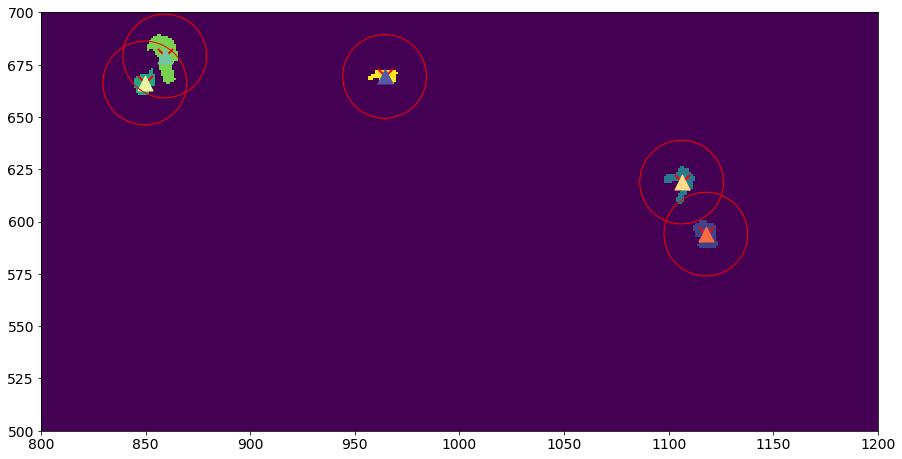

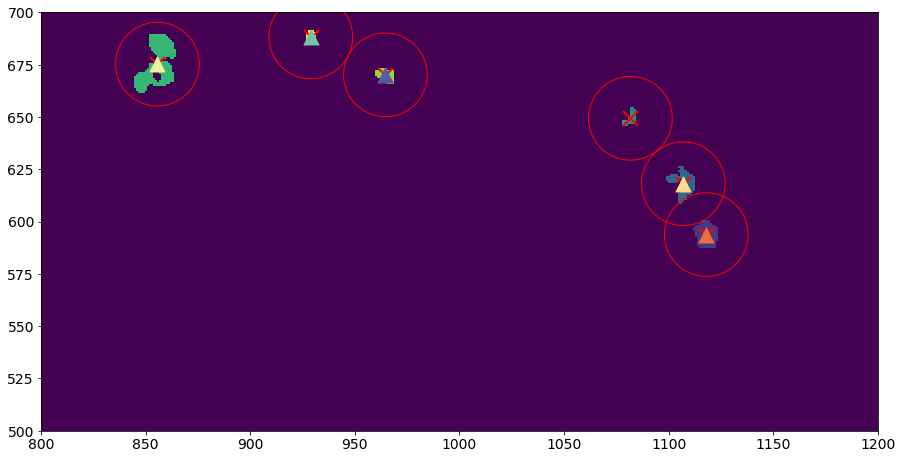

In [351]:
fig = plt.figure(0)
ax = fig.add_subplot(111)
plt.xlim([800, 1200])
plt.ylim([500, 700])
plt.imshow(region_map_1, zorder=0)

counter = 0
for i in ZZ[0]:
    #print(i)
    counter+=1
    plt.scatter(centers_1[i, 0], centers_1[i, 1], zorder=10, marker='^', color=plt.cm.Spectral(counter*50))

plt.scatter(centers_1[:, 0], centers_1[:, 1], zorder=1, marker='x', color='r')
#plt.scatter(centers_2[:, 0], centers_2[:, 1], zorder=1, marker='x', color='b')

for i in range(centers_1.shape[0]):
    ax.add_patch(Circle((centers_1[i, 0], centers_1[i, 1]), 20,
                           fill=False, zorder=10, linewidth=1, edgecolor='r', facecolor='none'))

#find_nearest((centers_1[3, 0], centers_1[3, 1]), centers_2)

fig = plt.figure(1)
ax = fig.add_subplot(111)
plt.xlim([800, 1200])
plt.ylim([500, 700])
plt.imshow(region_map_2, zorder=0)
#plt.scatter(x,y,zorder=1,marker='^', color='g')


plt.scatter(centers_2[:, 0], centers_2[:, 1], zorder=1, marker='x', color='r')
#plt.scatter(centers_2[3,0], centers_2[3,1], zorder=10, marker='^')
#plt.scatter(centers_1[:, 0], centers_1[:, 1], zorder=1, marker='x', color='b')
counter=0
for i in ZZ[1]:
    counter+=1
    plt.scatter(centers_2[i, 0], centers_2[i, 1], zorder=10, marker='^', color=plt.cm.Spectral(counter*50))

for i in range(centers_2.shape[0]):
    ax.add_patch(Circle((centers_2[i, 0], centers_2[i, 1]), 20,
                           fill=False, zorder=10, linewidth=1, edgecolor='r', facecolor='none'))
    
    

Using 4 directions search map on HMI hmi 2013-12-13 11:10:09
Using 4 directions search map on HMI hmi 2013-12-13 11:22:09
Using 4 directions search map on HMI hmi 2013-12-13 11:34:09
Using 4 directions search map on HMI hmi 2013-12-13 11:46:09
Using 4 directions search map on HMI hmi 2013-12-13 11:58:09


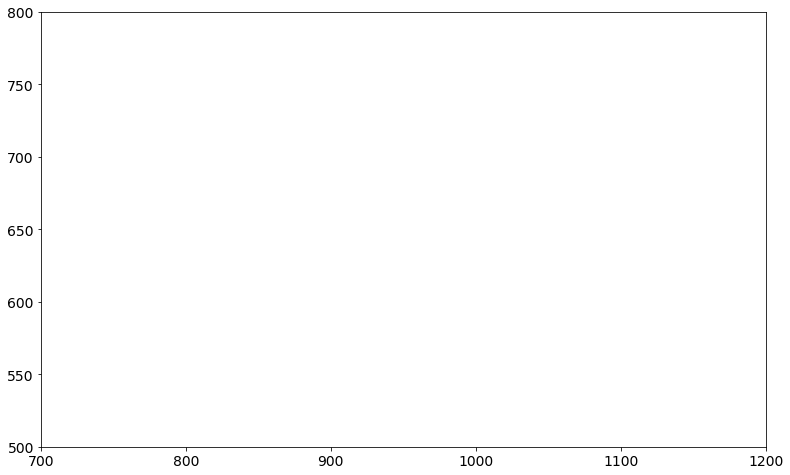

In [294]:
from celluloid import Camera
#Create placeholders for canvas
fig, ax = plt.subplots()
camera = Camera(fig)
#Fix canvas size (because data dimension changes with time)
plt.xlim([700, 1200])
plt.ylim([500, 800])


#for start in range(627,632):
for start in range(600,605):
    centers_1, region_map_1 = get_patches_and_vectors(sunpy.map.Map(cont_list[start]),
                                                  sunpy.map.Map(
                                                      Bp_list[start]),
                                                  sunpy.map.Map(
                                                      Bt_list[start]),
                                                  sunpy.map.Map(Br_list[start]), pixel_limit=plim, floodfill=4)

    plt.imshow(region_map_1, zorder=0, label=str(i))
    plt.scatter(centers_1[:, 0], centers_1[:, 1], zorder=1, marker='x', color='r')
    #plt.legend(loc='best')
    plt.text(750,750,str(start))
    for i in range(centers_1.shape[0]):
        ax.add_patch(Circle((centers_1[i, 0], centers_1[i, 1]), 20,
                           fill=False, zorder=10, linewidth=1, edgecolor='r', facecolor='none'))
    
    camera.snap()
    #plt.cla()

animation = camera.animate(interval=200)
#animation.save('what_are_we_tracking.mp4')


#uncomment this for live preview in jupyter notebook
from IPython.display import HTML
HTML(animation.to_html5_video())


[[ 1117.70588235   593.78151261   -68.25962172   -84.46813462
  -1458.83438938   119.        ]
 [ 1106.08547009   618.68376068   -39.12366872  -334.07866219
  -1380.46947059   117.        ]
 [ 1080.60606061   653.24242424   101.74636787  -554.95448184
  -1177.04093256    33.        ]
 [  849.97590361   664.98795181  -256.09286144  -256.61966711
   1420.30701304    83.        ]
 [  965.46666667   668.61666667   465.23484708   -28.91145659
   1292.2892163     60.        ]
 [  859.49101796   680.16167665   -93.8863398    231.60218204
   1693.57334469   167.        ]]


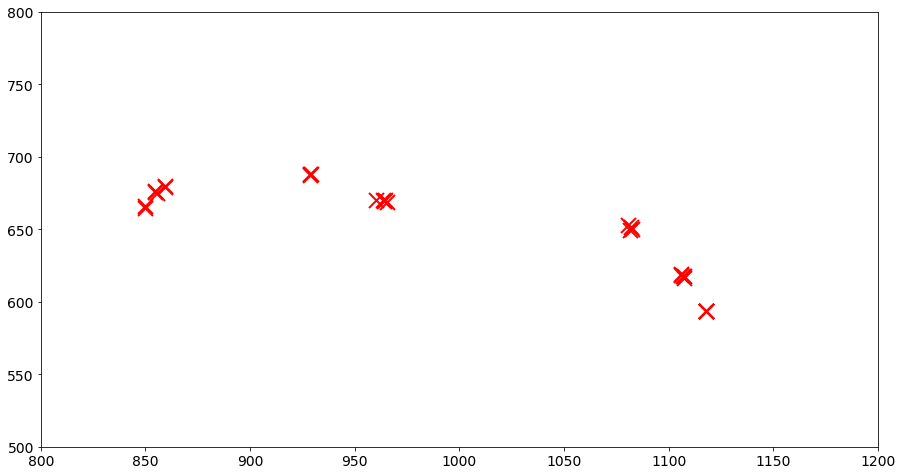

In [209]:

#print(A[338].ndim)
#print(A[338])
#print(A[360])
plt.figure(1)
#print(A[0].ndim)
#print(A[600])
plt.xlim([800, 1200])
plt.ylim([500, 800])

for i in range(600,605):
    if A[i].size == 0:
        continue
    if A[i].ndim == 1:
        plt.scatter(A[i][0], A[i][1], zorder=1, color='r', marker='x')
        continue
    plt.scatter(A[i][:,0],A[i][:,1], zorder=1, color='r', marker='x')

plt.show()

In [295]:
tracked = np.vstack(A[601:603])
#tracked = np.vstack(A[627:629])
print(tracked)

[[ 1117.74782609   594.           -71.93502036   -84.86601993
  -1485.71389388   115.        ]
 [ 1106.16964286   618.875         -2.32379305  -373.39487972
  -1380.17999698   112.        ]
 [  849.62068966   666.20689655  -272.72768133  -229.84113576
   1443.65811609    87.        ]
 [  859.17525773   679.15463918   -48.6013865    115.34913606
   1615.35294425   194.        ]
 [  964.2238806    669.35820896   432.22786624    38.80588105
   1323.59392434    67.        ]
 [ 1117.93495935   593.79674797  -106.00942829   -48.39009586
  -1472.42147627   123.        ]
 [ 1106.96428571   618.10714286   -35.22941349  -350.75114623
  -1433.09525209   112.        ]
 [ 1081.70588235   649.35294118   139.16545782  -301.934639
  -1259.27558178    34.        ]
 [  855.65156794   675.25087108  -101.59655474   -50.00313489
   1554.2624853    287.        ]
 [  964.61702128   670.10638298   469.26384838    92.92392704
   1342.1391559     47.        ]
 [  928.96153846   688.23076923     1.07558569   478

Estimated number of clusters: 1
Estimated number of noise points: 8


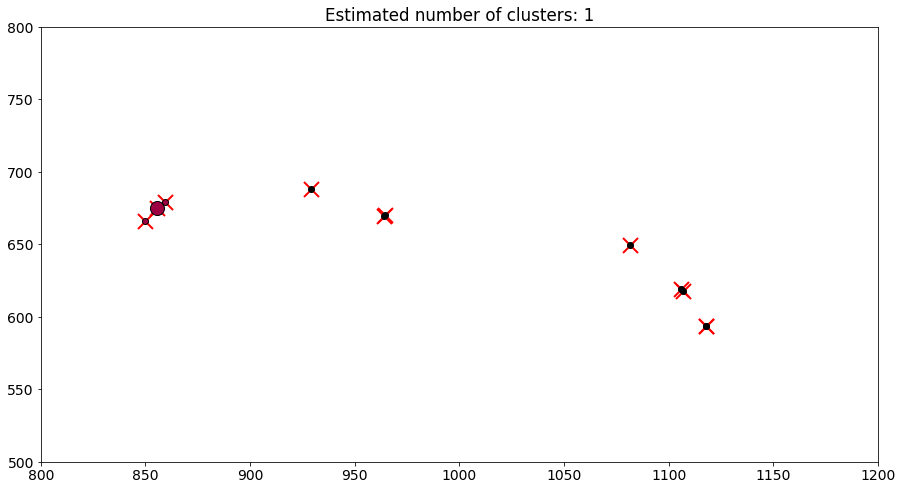

In [296]:
plt.xlim([800, 1200])
plt.ylim([500, 800])
plt.scatter(tracked[:,0],tracked[:,1], zorder=1, color='r', marker='x')
from sklearn.cluster import DBSCAN
from sklearn import metrics
X = np.dstack((tracked[:,0],tracked[:,1]))[0]
#print(X[0])
#This is working OK detecting mergers!
#Now how to find unmergers it works
db = DBSCAN(eps=15, min_samples=3).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()